# Import Libraries

In [43]:
import pandas as pd
import numpy as np
import plotly.express as px

# Read dataset

In [44]:
df = pd.read_csv('marketing_data.csv')
pd.set_option('display.max_columns', None)

In [45]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [47]:
df.duplicated().sum()

0

In [48]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('_', '')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [49]:
df.dropna(subset=['Income'], inplace=True)

In [50]:
df = df.reset_index()

In [51]:
df.drop('index', axis=1, inplace=True)

In [52]:
df.describe()

,ID,YearBirth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.150271,0.009477
std,3249.376275,11.985554,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.357417,0.096907
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
df['YearBirth'].unique()

array([1970, 1961, 1958, 1967, 1989, 1954, 1947, 1979, 1959, 1981, 1969,
       1977, 1960, 1966, 1976, 1965, 1956, 1975, 1971, 1986, 1972, 1974,
       1990, 1987, 1984, 1968, 1955, 1983, 1973, 1978, 1952, 1962, 1964,
       1982, 1963, 1957, 1980, 1945, 1949, 1948, 1953, 1946, 1985, 1992,
       1944, 1951, 1988, 1950, 1994, 1993, 1991, 1893, 1996, 1995, 1899,
       1943, 1941, 1940, 1900], dtype=int64)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   YearBirth            2216 non-null   int64 
 2   Education            2216 non-null   object
 3   MaritalStatus        2216 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   DtCustomer           2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProds         2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWeb

In [55]:
df.head(20)

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,130,411,240,32,43,1,4,7,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,0,11,0,0,7,1,2,1,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,IND


# Change datatypes

In [56]:
df['DtCustomer']= pd.to_datetime(df['DtCustomer'])
df['Income'] = df['Income'].str.replace('$', '').str.replace(',', '').str.replace(' ', '').str.replace('.','').str.replace('00','').astype(np.int64)

C:\Users\ZZ00JO865\AppData\Local\Temp\ipykernel_21224\2087036297.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   YearBirth            2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   MaritalStatus        2216 non-null   object        
 4   Income               2216 non-null   int64         
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   DtCustomer           2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [58]:
df.head()

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [59]:
df['TotalPrice'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['YearMonth'] = pd.to_datetime(df['DtCustomer'].dt.year.astype('str') + '-' + df['DtCustomer'].dt.month.astype('str'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   YearBirth            2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   MaritalStatus        2216 non-null   object        
 4   Income               2216 non-null   int64         
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   DtCustomer           2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

# Remove Outliers

<Axes: >

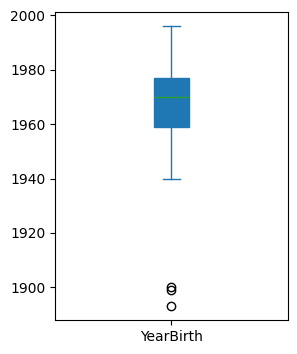

In [60]:
df['YearBirth'].plot(kind='box', figsize=(3,4), patch_artist=True)

<Axes: >

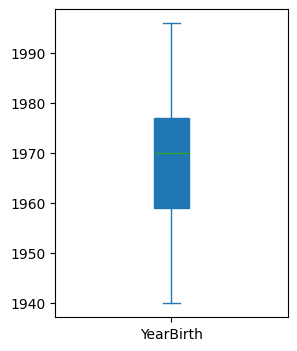

In [61]:
# Remove Date Outliers
df = df[df['YearBirth'] > 1900].reset_index(drop=True)
df['YearBirth'].plot(kind='box', figsize=(3,4), patch_artist=True)

# Visualisation

In [62]:
df_Num_Of_Customers_Per_Date = df.groupby('YearMonth')['ID'].size().reset_index()
px.line(df_Num_Of_Customers_Per_Date, x='YearMonth',y='ID',title='Total Number of Customers Enrolled in Company by Date')

In [73]:
df_Income_Education = df.groupby('Education')['ID'].count().reset_index()
df_Income_Education.sort_values('ID', ascending=False, inplace=True)
px.bar(df_Income_Education, x='Education',y='ID',color='Education',title='Number of People per Education')

In [64]:
df_Most_Payed_By_Country = df.groupby('Country')['TotalPrice'].sum().reset_index()
df_Most_Payed_By_Country.sort_values('TotalPrice', ascending=False, inplace=True)
#px.bar(df_Most_Payed_By_Country, x='Country',y='TotalPrice',color='Country',title='Most Payed By Country')
px.pie(df_Most_Payed_By_Country, values='TotalPrice', names='Country', title='Most Payed By Country')

In [65]:
df.head()

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalPrice,YearMonth
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,2014-06-01
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,577,2014-06-01
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,251,2014-05-01
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,11,2014-05-01
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,91,2014-04-01


In [66]:
def combine_columns(row):
    if row['Kidhome'] == 0 and row['Teenhome'] == 0:
        return 'Single'
    if row['Kidhome'] == 1 and row['Teenhome'] == 0:
        return '1Kid'
    if row['Kidhome'] == 2 and row['Teenhome'] == 0:
        return '2Kids'
    if row['Kidhome'] == 0 and row['Teenhome'] == 1:
        return '1Teen'
    if row['Kidhome'] == 0 and row['Teenhome'] == 2:
        return '2Teens'
    if row['Kidhome'] == 1 and row['Teenhome'] == 1:
        return '1Kid1Teen'
    if row['Kidhome'] == 1 and row['Teenhome'] == 2:
        return '1Kid2Teens'
    if row['Kidhome'] == 2 and row['Teenhome'] == 1:
        return '2Kids1Teen'
    if row['Kidhome'] == 2 and row['Teenhome'] == 2:
        return '2Kids2Teens'
    
df_Total_Purchase_Kids_Teens = df.groupby(['Kidhome','Teenhome'])['TotalPrice'].count().reset_index().sort_values(['TotalPrice'], ascending=False)
df_Total_Purchase_Kids_Teens['NumofChildren'] = df_Total_Purchase_Kids_Teens.apply(combine_columns, axis=1)
print(df_Total_Purchase_Kids_Teens)
px.bar(df_Total_Purchase_Kids_Teens,x='NumofChildren', y='TotalPrice',color='NumofChildren', title='Total Purchase by Kidhome and Teenhome')

   Kidhome  Teenhome  TotalPrice NumofChildren
0        0         0         632        Single
1        0         1         619         1Teen
3        1         0         496          1Kid
4        1         1         369     1Kid1Teen
2        0         2          30        2Teens
7        2         1          29    2Kids1Teen
5        1         2          21    1Kid2Teens
6        2         0          17         2Kids


In [67]:
df_Total_Price_Per_Date = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
px.line(df_Total_Price_Per_Date, x='YearMonth',y='TotalPrice',title='Total Price by Date')

In [68]:
# df_Num_Deals_WebPuchrases = df.groupby(['Country','NumDealsPurchases','NumWebPurchases']).value_counts().reset_index()
# print(df_Num_Deals_WebPuchrases)
# px.line(df_Num_Deals_WebPuchrases, x='Country',y=['NumWebPurchases','NumDealsPurchases'],title='Number of Web Purchases by NumDealsPurchases')

In [69]:
from plotly.subplots import make_subplots

In [70]:
subfig = make_subplots(specs=[[{'secondary_y': True}]])
fig1 = px.scatter(df_Total_Price_Per_Date, x='YearMonth', y='TotalPrice',color='YearMonth', title='Total Purchase by Year')
fig2 = px.line(df_Num_Of_Customers_Per_Date, x='YearMonth',y='ID',title='Total Number of Customers Enrolled in Company by Date')
fig2.update_traces(yaxis="y2")
subfig.add_traces(fig1.data + fig2.data)